# Pymaceuticals

In [142]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

## Prepare the Data

In [143]:
# read in both csv files into separate dataframes
meta_df = pd.read_csv("resources/Mouse_metadata.csv")
results_df = pd.read_csv("resources/Study_results.csv")

# show the head to see structure of meta df
meta_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [144]:
# show the head to see structure of results df
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [145]:
# merge datasets on default 'inner' join
merge_df = pd.merge(results_df, meta_df, on="Mouse ID")
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [146]:
# find the number of unique mice
num_mice = len(merge_df["Mouse ID"].value_counts())
num_mice

249

In [147]:
# find the number of duplicated rows
duplicate_df = merge_df.duplicated(subset=["Mouse ID","Timepoint"]).sum()
duplicate_df

5

In [148]:
# find just the duplicated data
merge_df.loc[merge_df.duplicated(subset=["Mouse ID","Timepoint"]),:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [149]:
# find all data associated with above Mouse ID
merge_df.loc[merge_df["Mouse ID"] == "g989",:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [150]:
# drop all rows with duplicate Mouse ID and Timepoint and create new dataframe
cleaned_df = merge_df[merge_df["Mouse ID"] != "g989"]
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [151]:
len(cleaned_df["Mouse ID"].value_counts())

248

In [152]:
# make sure rows associated with g989 ID are gone
cleaned_df.loc[cleaned_df["Mouse ID"] == "g989",:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


## Summary Statistics

In [153]:
# A row for each drug regimen
    # These regimen names should be contained in the index column.
# A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.

# groupby cleaned df by Drug Regimen
drug_df = cleaned_df.groupby("Drug Regimen")

# create series for each statistic to become columns in new df
drug_mean = drug_df["Tumor Volume (mm3)"].mean()
drug_median = drug_df["Tumor Volume (mm3)"].median()
drug_variance = drug_df["Tumor Volume (mm3)"].var()
drug_standev = drug_df["Tumor Volume (mm3)"].std()
drug_sem = drug_df["Tumor Volume (mm3)"].sem()

# create new df
tumor_stats = pd.DataFrame({"Mean":drug_mean,
                           "Median":drug_median,
                           "Variance":drug_variance,
                           "Standard Deviation":drug_standev,
                           "SEM":drug_sem})

tumor_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [154]:
# using aggregate method
tumor_stats_agg = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
tumor_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Visualizations

In [155]:
# Bar Chart 1
    # show the total number of time points for all mice tested for each drug regimen
    # drug x axis, tot time pts y axis
    # pandas method
   


In [156]:

drug_index_df = cleaned_df.set_index("Drug Regimen")
drug_index_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Capomulin,b128,5,45.651331,0,Female,9,22
Capomulin,b128,10,43.270852,0,Female,9,22
Capomulin,b128,15,43.784893,0,Female,9,22
Capomulin,b128,20,42.731552,0,Female,9,22
...,...,...,...,...,...,...,...
Capomulin,m601,25,33.118756,1,Male,22,17
Capomulin,m601,30,31.758275,1,Male,22,17
Capomulin,m601,35,30.834357,1,Male,22,17


In [157]:
drug_index_df["Timepoint"].count()

1880

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

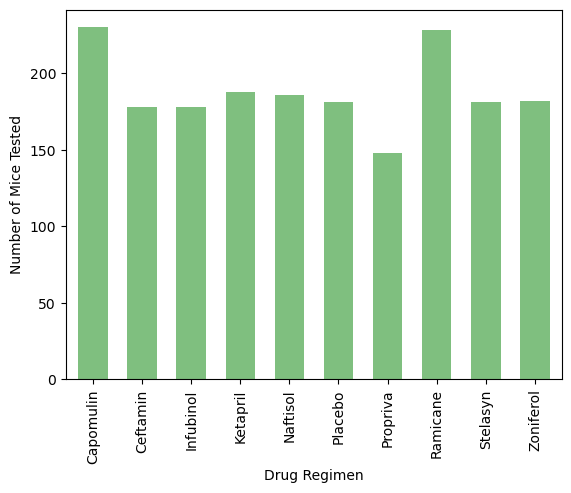

In [158]:
bar_pandas = cleaned_df.groupby("Drug Regimen").count()["Timepoint"].plot(kind="bar", width=0.6, ylabel="Number of Mice Tested",
                                                                         alpha=0.5, color="green", sort_columns=True)
bar_pandas

<BarContainer object of 10 artists>

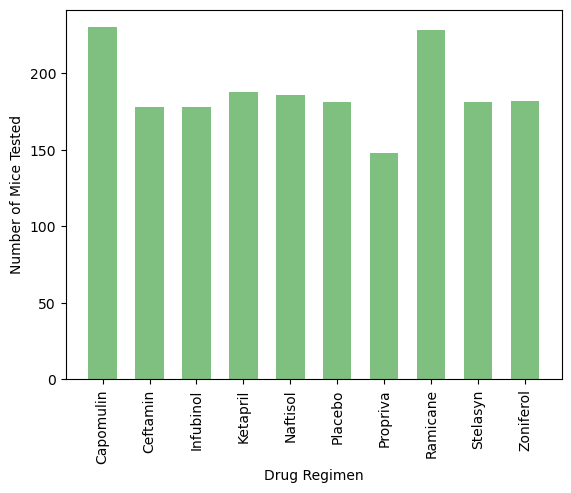

In [159]:
# Bar Chart 2
    # show the total number of time points for all mice tested for each drug regimen
    # drug x axis, tot time pts y axis
    # matplotlib method


tests_per_drug = cleaned_df.groupby("Drug Regimen").count()["Timepoint"]
#tests_per_drug
x_axis = np.arange(len(tests_per_drug))
#x_axis
drug_labels = []
tick_locations = [value for value in x_axis]
fig0, ax0 = plt.subplots()
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo","Propriva",
                           "Ramicane","Stelasyn","Zoniferol"], rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
ax0.bar(x_axis, tests_per_drug, width=0.6, color="g", alpha=0.5, align="center")


In [160]:
# pie chart 1
    # create a pie chart using pandas that shows the distribution of male vs female mic in the study
    
cleaned_df["Sex"].value_counts()

Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

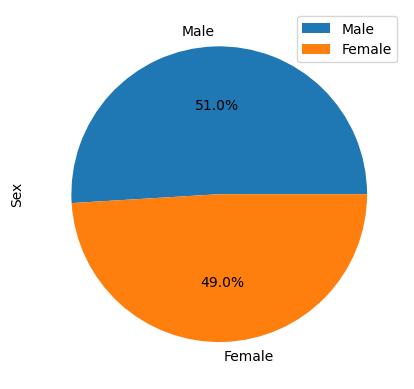

In [161]:
pie_pandas = cleaned_df["Sex"].value_counts().plot(kind="pie", ylabel="Sex", legend=True, autopct='%1.1f%%')
pie_pandas

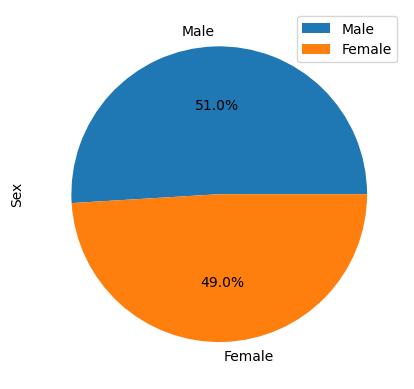

In [162]:
# pie chart 2
    # create a pie chart using matplotlib that shows the distribution of male vs female mic in the study
    
labels = ["Male","Female"]
counts = [958,922]

fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.legend(labels)
plt.show()

In [163]:
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Quartiles, Outliers and Boxplots

In [164]:
# get the last timeframe for each mouse

greatest_df = pd.DataFrame(cleaned_df.groupby("Mouse ID").max()["Timepoint"])
greatest_df

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [165]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_merge = pd.merge(cleaned_df, greatest_df, on=["Mouse ID", "Timepoint"])
tumor_volume_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [166]:
tumor_volume_merge.loc[tumor_volume_merge["Drug Regimen"] == "Infubinol"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
29,c326,5,36.321346,0,Infubinol,Female,18,25
30,c139,45,72.226731,2,Infubinol,Male,11,28
31,v339,5,46.250112,0,Infubinol,Male,20,26
32,a577,30,57.031862,2,Infubinol,Female,6,25
33,y163,45,67.685569,3,Infubinol,Female,17,27
34,k483,45,66.196912,3,Infubinol,Female,20,30
35,k804,35,62.117279,2,Infubinol,Female,23,29
36,o809,35,55.629428,1,Infubinol,Male,3,25
37,z581,45,62.754451,3,Infubinol,Female,24,25
38,a251,45,65.525743,1,Infubinol,Female,21,25


In [167]:
# list of 4 most promising drug treatments
promising_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# empty list for each drug volume data
cap_volume = []
ram_volume = []
infu_volume = []
ceft_volume = []
# list of above drug volume lists to be used in same boxplot fig
drug_volume = [cap_volume, ram_volume, infu_volume, ceft_volume]

# loop through tumor_volume_merge df using conditional and iloc to append corresponding tumor volumes to
# the empty lists for each drug
for index in range(len(tumor_volume_merge)):
    if tumor_volume_merge["Drug Regimen"].iloc[index] == "Capomulin":
        cap_volume.append(tumor_volume_merge["Tumor Volume (mm3)"].iloc[index])
    elif tumor_volume_merge["Drug Regimen"].iloc[index] == "Ramicane":
        ram_volume.append(tumor_volume_merge["Tumor Volume (mm3)"].iloc[index])
    elif tumor_volume_merge["Drug Regimen"].iloc[index] == "Infubinol":
        infu_volume.append(tumor_volume_merge["Tumor Volume (mm3)"].iloc[index])
    elif tumor_volume_merge["Drug Regimen"].iloc[index] == "Ceftamin":
        ceft_volume.append(tumor_volume_merge["Tumor Volume (mm3)"].iloc[index])
        
# find upper/lower bounds and potential outliers for each drug volume list

# set quantiles
cap_quant = np.quantile(cap_volume, [0.25,0.5,0.75])
ram_quant = np.quantile(ram_volume, [0.25,0.5,0.75])
infu_quant = np.quantile(infu_volume, [0.25,0.5,0.75])
ceft_quant = np.quantile(ceft_volume, [0.25,0.5,0.75])

# set iqr for capomulin
lowerq_cap = cap_quant[0]
upperq_cap = cap_quant[2]
iqr_cap = upperq_cap-lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
# set iqr for ramicane
lowerq_ram = ram_quant[0]
upperq_ram = ram_quant[2]
iqr_ram = upperq_ram-lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
# set iqr for infubinol
lowerq_infu = infu_quant[0]
upperq_infu = infu_quant[2]
iqr_infu = upperq_infu-lowerq_infu
lower_bound_infu = lowerq_infu - (1.5*iqr_infu)
upper_bound_infu = upperq_infu + (1.5*iqr_infu)
# set iqr for ceftamin
lowerq_ceft = ceft_quant[0]
upperq_ceft = ceft_quant[2]
iqr_ceft = upperq_ceft-lowerq_ceft
lower_bound_ceft = lowerq_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upperq_ceft + (1.5*iqr_ceft)

# empty outlier list and for loop for capumolin
cap_outlier = []
for value in cap_volume:   
    if (value > upper_bound_cap) | (value < lower_bound_cap):
        cap_outlier.append(value)
        
# empty outlier list and for loop for ramicane
ram_outlier = []        
for value in ram_volume:
    if (value > upper_bound_ram) | (value < lower_bound_ram):
        ram_outlier.append(value)

# empty outlier list and for loop for infubinol
infu_outlier = []        
for value in infu_volume:
    if (value > upper_bound_infu) | (value < lower_bound_infu):
        infu_outlier.append(value)
        
# empty outlier list and for loop for ceftamin
ceft_outlier = []        
for value in ceft_volume:
    if (value > upper_bound_ceft) | (value < lower_bound_ceft):
        ceft_outlier.append(value)

# print each list of outliers
print(f"Capomulin's potential outliers: {cap_outlier}")
print(f"Ramicane's potential outliers: {ram_outlier}")
print(f"Infubinol's potential outliers: {infu_outlier}")
print(f"Ceftamin's potential outliers: {ceft_outlier}")
 



Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


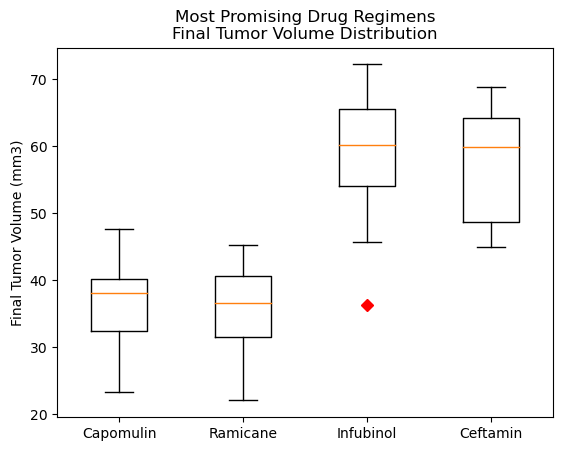

In [168]:
# use matplotlib to create a boxplot of tumor volumes 
# for the 4 most promising drug regimens and all in one figure

fig2, ax2 = plt.subplots()
ax2.boxplot(drug_volume, 0, "rD")
ax2.set(title="Most Promising Drug Regimens\nFinal Tumor Volume Distribution",
       ylabel="Final Tumor Volume (mm3)",
       xticklabels=promising_drugs)
#ax2.set_xticklabels(promising_drugs)
plt.show()

## Line & Scatter Plots

In [169]:
# create new df of mouse id m601
m601 = cleaned_df.loc[cleaned_df["Mouse ID"] == "m601"]
m601

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1883,m601,0,45.000000,0,Capomulin,Male,22,17
1884,m601,5,41.408591,1,Capomulin,Male,22,17
1885,m601,10,36.825367,1,Capomulin,Male,22,17
1886,m601,15,35.464612,1,Capomulin,Male,22,17
1887,m601,20,34.255732,1,Capomulin,Male,22,17
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17
1892,m601,45,28.430964,1,Capomulin,Male,22,17


<AxesSubplot:title={'center':'M601: Capomulin Drug Regimen'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

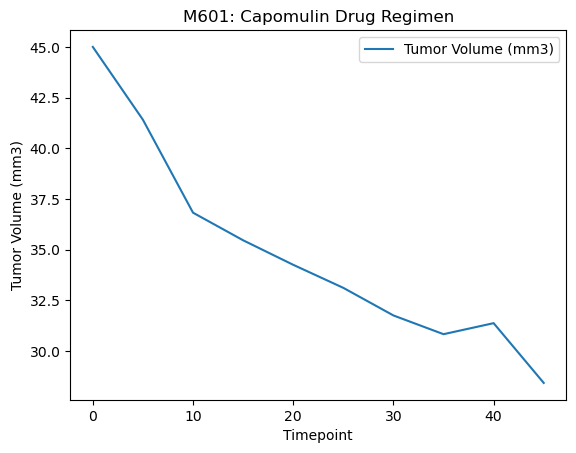

In [170]:
# generate a line plot for m601: x-axis = timepoint, y-axis = tumor volume
# make sure to label properly
m601.plot.line(x="Timepoint", y="Tumor Volume (mm3)", ylabel="Tumor Volume (mm3)", title="M601: Capomulin Drug Regimen")

In [171]:
# create df of just mice who are on the Capomulin regimen
cap_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
cap_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


<AxesSubplot:title={'center':'Weight (g) of Mice vs Average Tumor Volume (mm3)'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

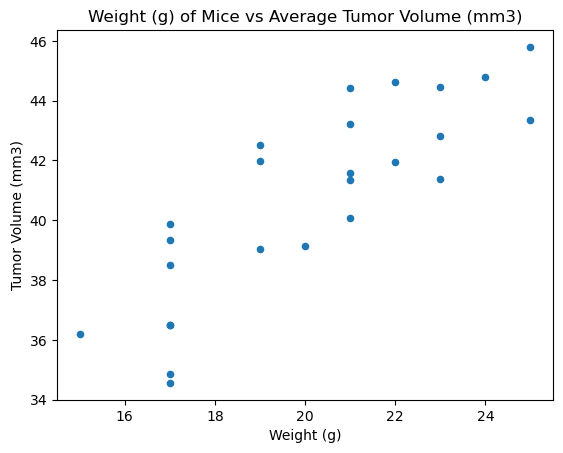

In [172]:
# create another df from the one above that groupby's Mouse Id and Weight using mean of tumor volume as method
cap_vol_weight = pd.DataFrame(cap_df.groupby(["Mouse ID","Weight (g)"]).mean()["Tumor Volume (mm3)"])
#
cap_vol_weight.reset_index("Weight (g)", inplace=True)
#cap_vol_weight
cap_vol_weight.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)", 
                            title= "Weight (g) of Mice vs Average Tumor Volume (mm3)")




## Correlation & Regression

In [173]:
cap_vol_weight.head()

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


In [174]:
# create correlation between avg tumor volume and weight
cap_avg_vol = cap_vol_weight["Tumor Volume (mm3)"]
cap_weight = cap_vol_weight["Weight (g)"]
correlation = st.pearsonr(cap_avg_vol,cap_weight)
# print correlation results at position [0] of array
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

The correlation between mouse weight and the average tumor volume is 0.84


The correlation between mouse weight and the average tumor volume is 0.84


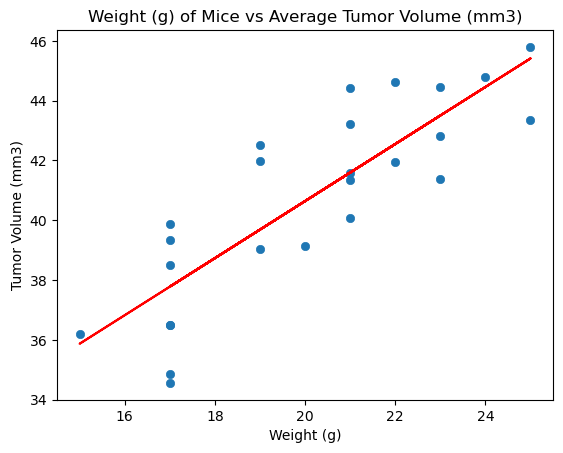

In [182]:
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_weight, cap_avg_vol)
regress_values = cap_weight * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cap_weight, cap_avg_vol, linewidths=0.5)
plt.plot(cap_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight (g) of Mice vs Average Tumor Volume (mm3)")
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')
plt.show()